In [40]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

# Diplay the first five rows of the scaled data
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [41]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
coin_names = df_market_data.index
df_market_data_scaled["coin_id"] = coin_names

# Set the coinid column as index
df_market_data_scaled.set_index("coin_id", inplace=True)

# Display sample data
df_market_data_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [36]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

In [38]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {k: inertia for k, inertia in zip(k_values, inertia_values)}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(list(elbow_data.items()), columns=["k", "inertia"])
elbow_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,55.389957
6,7,48.164934
7,8,37.288187
8,9,33.197121
9,10,28.354555


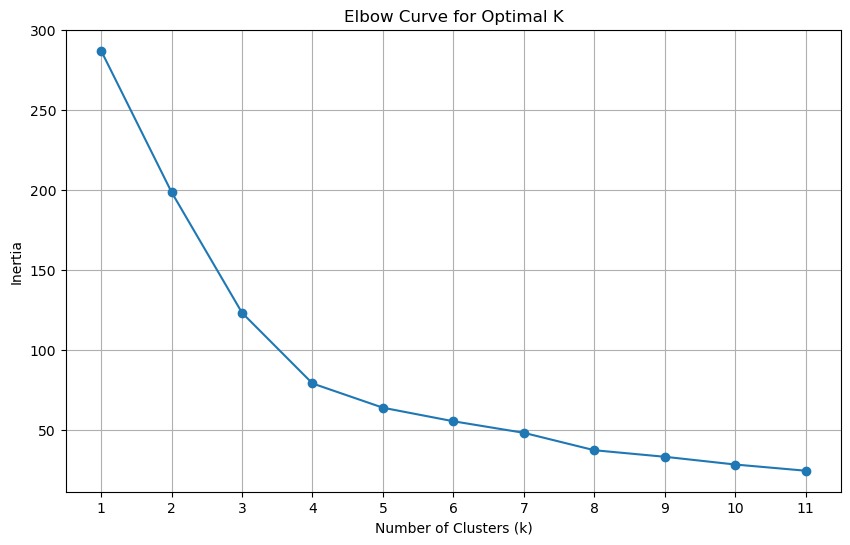

In [42]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title("Elbow Curve for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])  # Set x-axis ticks to match k values
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value would be where the inertia values begin to decrease at a slower rate, in this case it would be 5.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [43]:
# Initialize the K-Means model using the best value for k
best_k = 5
kmeans_model = KMeans(n_clusters=best_k)

In [44]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_assignments = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_assignments)

[1 1 3 3 1 1 1 1 1 3 3 3 3 1 3 1 3 3 1 3 3 1 3 3 0 3 3 3 1 0 3 3 2 1 3 0 4
 3 3 3 3]


In [46]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [47]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy["predicted_cluster"] = cluster_assignments

# Display sample data
print(df_market_data_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [48]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col=0)

# K-means model and fit data
best_k = 5  
kmeans_model = KMeans(n_clusters=best_k)
kmeans_model.fit(df_market_data_scaled)
cluster_assignments = kmeans_model.predict(df_market_data_scaled)

# Create a scatter plot using hvPlot by setting 
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",

# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
    color="predicted_cluster",
    hover_cols=["crypto_name"],
    title="Scatter Plot of Cryptocurrencies",
    cmap="tab10",  # Use a colormap for color variety
    width=800,
    height=600
)

scatter_plot

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [50]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca_model.fit_transform(df_market_data_scaled_copy)

# Create a DataFrame from the transformed data
pca_df = pd.DataFrame(data=pca_transformed_data, columns=["PC1", "PC2", "PC3"])

# View the first five rows of the DataFrame. 
print(pca_df.head())

        PC1       PC2       PC3
0 -0.564811  1.217168 -0.772892
1 -0.428990  0.922718 -1.265300
2 -0.450428 -0.502382  0.970393
3 -0.490247 -0.546140  0.884175
4 -1.086720  2.536688 -1.393929


In [51]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Explained Variance for PC{i}: {variance:.4f}")

Explained Variance for PC1: 0.3158
Explained Variance for PC2: 0.3085
Explained Variance for PC3: 0.2073


In [52]:
# This code, will calculate and print the total explained variance of the three principal components.
explained_variance_pc1 = 0.3158
explained_variance_pc2 = 0.3085
explained_variance_pc3 = 0.2073

total_explained_variance = (
    explained_variance_pc1 + explained_variance_pc2 + explained_variance_pc3
)

print(f"Total Explained Variance: {total_explained_variance:.4f}")

Total Explained Variance: 0.8316


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8316

In [55]:
# Create a new DataFrame with the PCA data
pca_data_df = pd.DataFrame(data=pca_transformed_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
pca_data_df["coin_id"] = df_market_data_scaled_copy.index

# Set the "coin_id" column as index
pca_data_df.set_index("coin_id", inplace=True)

# Display sample data
pca_data_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.564811,1.217168,-0.772892
ethereum,-0.428990,0.922718,-1.265300
tether,-0.450428,-0.502382,0.970393
ripple,-0.490247,-0.546140,0.884175
bitcoin-cash,-1.086720,2.536688,-1.393929


---

### Find the Best Value for k Using the PCA Data

In [56]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12)) 

In [74]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using df_market_data_pca
    kmeans_model.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model.inertia_)


/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

In [75]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

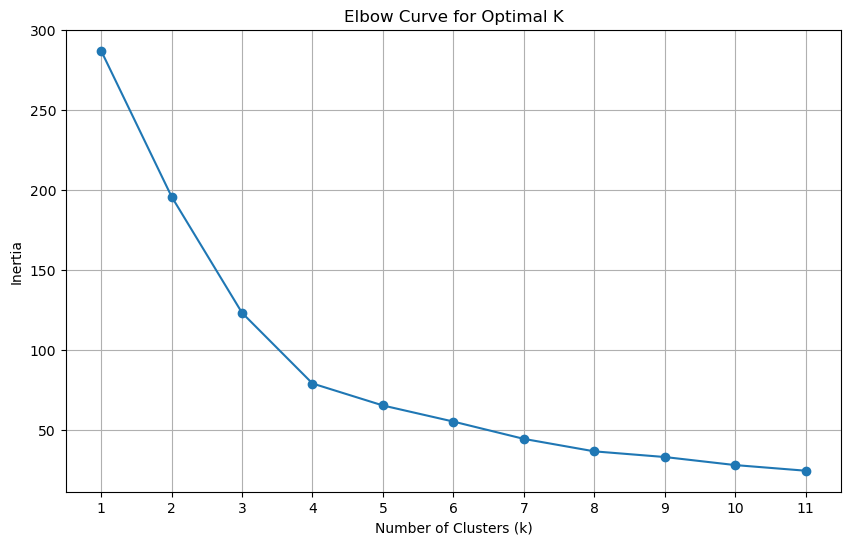

In [76]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title("Elbow Curve for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** In this case the curve starts to level off at 5 it appears. This can be subjective


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Not really,barely maybe but its still between 5 and 6

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [61]:
# Initialize the K-Means model using the best value for k
best_k = 5 
kmeans_model = KMeans(n_clusters=best_k)


In [63]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_data_df)

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [65]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_assignments_pca = kmeans_model.predict(pca_data_df)  # Use your PCA-transformed data here

# Print the resulting array of cluster values
print(cluster_assignments_pca)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 4 0 0 3 1 0 1 2
 0 0 0 0]


In [67]:
# Create a copy of the DataFrame with the PCA data
pca_data_df_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_df_copy["predicted_cluster"] = cluster_assignments_pca

# Display sample data
pca_data_df_copy.head()


,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.564811,1.217168,-0.772892,1
ethereum,-0.428990,0.922718,-1.265300,1
tether,-0.450428,-0.502382,0.970393,0
ripple,-0.490247,-0.546140,0.884175,0
bitcoin-cash,-1.086720,2.536688,-1.393929,1


In [71]:
best_k = 5  
kmeans_model = KMeans(n_clusters=best_k)
kmeans_model.fit(pca_data_df)  
cluster_assignments_pca = kmeans_model.predict(pca_data_df)

pca_data_df_copy["predicted_cluster"] = cluster_assignments_pca
pca_data_df_copy["coin_id"] = pca_data_df.index

# Create a scatter plot using hvPlot by setting 
scatter_plot_pca = pca_data_df_copy.hvplot.scatter(
    
    # `x="PC1"` and `y="PC2"`.
    x="PC1",
    y="PC2",
    
    # Color the graph points with the labels found using K-Means and 
    # add the crypto name in the `hover_cols` parameter to identify 
    # the cryptocurrency represented by each data point.
    color="predicted_cluster",
    hover_cols=["coin_id"],
    title="Scatter Plot of Cryptocurrencies (PCA Data)",
    cmap="tab10",  # Use a colormap for color variety
    width=800,
    height=600
)

scatter_plot_pca    

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


:Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

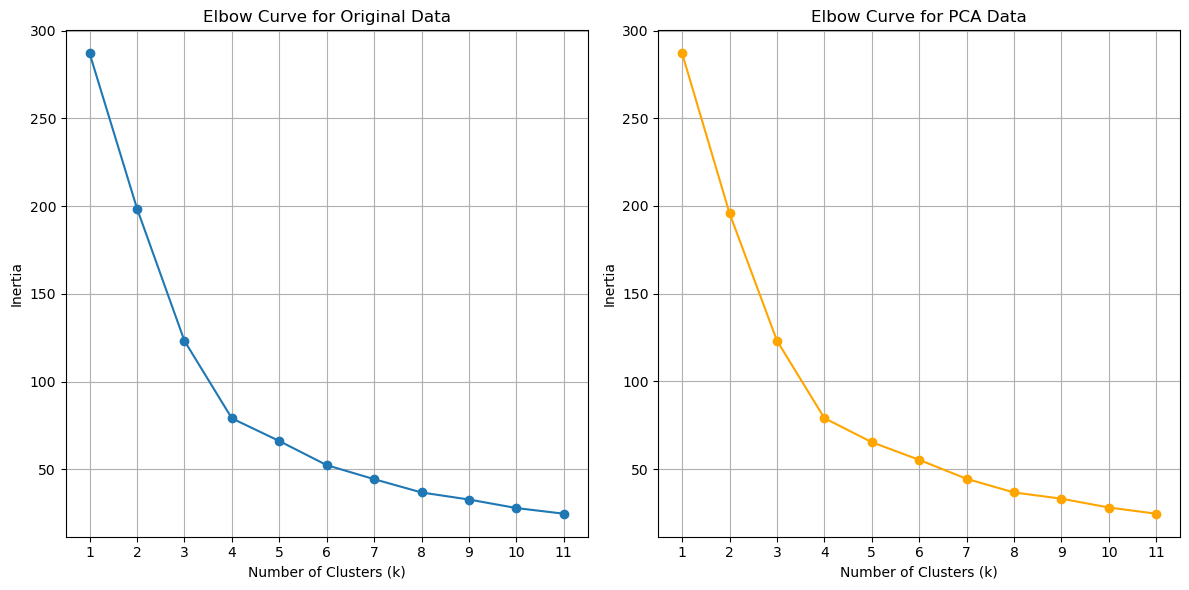

In [77]:
# Composite plot to contrast the Elbow curves
# Create a line chart for the original data's Elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for the original data
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Curve for Original Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

# Create a line chart for the PCA data's Elbow curve
plt.subplot(1, 2, 2)  # Create a subplot for the PCA data
plt.plot(k_values, inertia_values_pca, marker='o', color='orange')
plt.title("Elbow Curve for PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [87]:
# Composite plot to contrast the clusters
# Initialize KMeans models and fit them to the data
best_k_original = 5  
best_k_pca = 5 

kmeans_original = KMeans(n_clusters=best_k_original)
kmeans_original.fit(df_market_data)  # Use your original data here

kmeans_pca = KMeans(n_clusters=best_k_pca)
kmeans_pca.fit(pca_data_df)  # Use your PCA-transformed data here

# Get cluster assignments for both datasets
cluster_assignments_original = kmeans_original.labels_
cluster_assignments_pca = kmeans_pca.labels_

# Add cluster assignments to the DataFrames
df_market_data["cluster_assignment"] = cluster_assignments_original
pca_data_df["cluster_assignment"] = cluster_assignments_pca

# Create scatter plots for both datasets using hvPlot
scatter_original = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="cluster_assignment",
    title="Clusters for Original Data",
    cmap="tab10",
    width=400,
    height=300
)

scatter_pca = pca_data_df.hvplot.scatter(
    x="PC1",  
    y="PC2",  
    color="cluster_assignment",
    title="Clusters for PCA Data",
    cmap="tab10",
    width=400,
    height=300
)

# Create a composite layout of the scatter plots arranged horizontally
composite_plot = scatter_original + scatter_pca

# Display the composite plot
composite_plot

/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilioaristeguiflores/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster_assignment)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster_assignment)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Its easier to visualize if you have less features, but you can lose some important data. It can get rid of unnecessary data but helps to interpret results better. With large datasets, having less features will speed up computation and help to find new patterns. 